<a href="https://colab.research.google.com/github/lauraemmanuella/AED/blob/main/Ordena%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de ordenação

> Processo de rearranjar um conjunto de elementos de uma estrutura de dados em uma ordem definida (crescente ou decrescente)

**Visa facilitar a recuperação posterior de itens do conjunto ordenado**


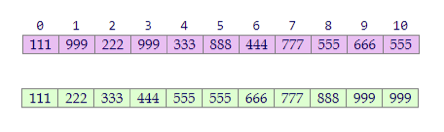

> Principais algoritmos

* Bubble sort
* Selection sort
* Insertion sort
* Merge sort
* Quick sort

Ver animação dos algoritmos: https://visualgo.net/en/sorting

> Antes de vermos os algoritmos de ordenação, vamos ver um exemplo de código em Python para trocar elementos dentro de uma lista, pois usaremos essa instrução em alguns algoritmos

In [7]:
entrada = [98, 67, 34, 5, 87, 4, 3]

#faz a troca entre os elementos da posição 0 e posição 1
entrada[0], entrada[1] = entrada[1], entrada[0] 

#Na prática essa troca ocorre em 3 passos, como abaixo:
'''
temp = entrada[0]
entrada[0] = entrada[1]
entrada[1] = temp
'''

#Mas, o Python permite o comando em uma linha, como mostrado acima

print(entrada)

[67, 98, 34, 5, 87, 4, 3]


# Bubble sort

Método bastante simples, mas com complexidade quadrática, o que o torna lento para grandes entradas

A cada iteração do algoritmo, ele percorre a entrada **comparando o elemento mais à esquerda com os elementos mais à direita. Sempre que o elemento mais à esquerda for maior que o elemento mais à direita, ele troca os dois.**

> A cada iteração, o algoritmo coloca o maior na posição mais à direita.

Nesse caso, ele faz N voltas (tamanho da lista) e a cada volta irá comparar cada elemento da lista com seu vizinho, desde a posição 0 até a última posição ainda não ordenada. Ou seja:

* na primeira volta irá comparar os elementos desde a posição 0 até a posição n
* na segunda volta vai de 0 até n-1, pois a última posição já estará em ordem
* na terceira volta vai de 0 até n-2, pois a penúltima posição já estará em ordem
* e assim por diante, considerando que ao final de cada execução as posições mais à direita estarão ordenadas (com os maiores valores)

Por isso no laço interno tem `n-i `no range, pois a cada volta ele irá diminuir mais uma posição do final. 


> O `-1` no `range(n-i-1) ` evita que a comparação seja feita com uma posição inexistente, já que a comparação é feita entre o elemento `j` e o element `j+1`, assim ele vai sempre até a penúltima posição não ordenada para que ela seja comparada com a última posição não ordenada ainda

Sugestão de vídeo: https://www.youtube.com/watch?v=lyZQPjUT5B4


> Complexidade O(n^2) - Ordem quadrática

Na prática f(n) = (n^2)/2, pois a cada volta do laço externo, o laço interno reduz em 1 unidade, mas no comportamente assintótico, removemos a constante


In [47]:
entrada = [98, 87, 67, 34, 5, 4, 3]

'''Função de ordenação usando algoritmo Bubble Sort'''
def bubblesort(lista):
  cont = 0
  n = len(lista)
  for i in range(n): 
    print(f'\nITERAÇÃO {i}')
    for j in range(n-i-1):
      print(f'\tcompara posição {j} com posição {j+1}')
      if lista[j] > lista[j+1]: #se o elemento da posição j for maior que o elemento da posição j+1
        lista[j], lista[j+1] = lista[j+1], lista[j] #faz a troca dos elementos
        print(f'\tTrocou {lista}')
        cont += 1
  print(f'Trocou {cont} vezes')
  return lista

#TESTANDO A FUNÇÃO BUBBLESORT
print(f'Inicio: {entrada}\n')
print(f'\nFinal: {bubblesort(entrada)}')

Inicio: [98, 87, 67, 34, 5, 4, 3]


ITERAÇÃO 0
	compara posição 0 com posição 1
	Trocou [87, 98, 67, 34, 5, 4, 3]
	compara posição 1 com posição 2
	Trocou [87, 67, 98, 34, 5, 4, 3]
	compara posição 2 com posição 3
	Trocou [87, 67, 34, 98, 5, 4, 3]
	compara posição 3 com posição 4
	Trocou [87, 67, 34, 5, 98, 4, 3]
	compara posição 4 com posição 5
	Trocou [87, 67, 34, 5, 4, 98, 3]
	compara posição 5 com posição 6
	Trocou [87, 67, 34, 5, 4, 3, 98]

ITERAÇÃO 1
	compara posição 0 com posição 1
	Trocou [67, 87, 34, 5, 4, 3, 98]
	compara posição 1 com posição 2
	Trocou [67, 34, 87, 5, 4, 3, 98]
	compara posição 2 com posição 3
	Trocou [67, 34, 5, 87, 4, 3, 98]
	compara posição 3 com posição 4
	Trocou [67, 34, 5, 4, 87, 3, 98]
	compara posição 4 com posição 5
	Trocou [67, 34, 5, 4, 3, 87, 98]

ITERAÇÃO 2
	compara posição 0 com posição 1
	Trocou [34, 67, 5, 4, 3, 87, 98]
	compara posição 1 com posição 2
	Trocou [34, 5, 67, 4, 3, 87, 98]
	compara posição 2 com posição 3
	Trocou [34, 5, 4, 67, 3,

# Selection sort

Percorre a lista N vezes, a cada volta procura o menor elemento e troca ele com a posição mais à esquerda ainda não ordenada.

> Ao final de cada volta, a posição mais à erquerda estará em ordem (com os menores valores)

**Melhora o método da bolha, reduzindo o número de trocas necessárias (mas, a quantidade de comparações permanece a mesma)**

> Fará N trocas, mas ainda fará N^2 comparações

In [48]:
entrada = [98, 87, 67, 34, 5, 4, 3]

def selectionsort(lista):
  cont = 0
  n = len(lista) #tamanho da lista
  for i in range(n): #percorre a lista
    id_minimo = i #id_minimo vai guardar a posição do menor elemento, inicialmente será a posição i
    for j in range(i + 1, n): #percorre as próximas posições (i+1 em diante)
      if lista[id_minimo] > lista[j]: #procura o menor elemento na lista
        id_minimo = j #guarda a posição do menor elemento da lista
    lista[i], lista[id_minimo] = lista[id_minimo], lista[i] #troca o menor elemento com o elemento da posição i (mais à esquerda)
    print(f'\tTrocou {lista}')
    cont += 1
  print(f'Trocou {cont} vezes')
  return lista


#TESTANDO A FUNÇÃO SELECTIONSORT
print(f'Inicio: {entrada}\n')
print(f'\nFinal: {selectionsort(entrada)}')

Inicio: [98, 87, 67, 34, 5, 4, 3]

	Trocou [3, 87, 67, 34, 5, 4, 98]
	Trocou [3, 4, 67, 34, 5, 87, 98]
	Trocou [3, 4, 5, 34, 67, 87, 98]
	Trocou [3, 4, 5, 34, 67, 87, 98]
	Trocou [3, 4, 5, 34, 67, 87, 98]
	Trocou [3, 4, 5, 34, 67, 87, 98]
	Trocou [3, 4, 5, 34, 67, 87, 98]
Trocou 7 vezes

Final: [3, 4, 5, 34, 67, 87, 98]


# Insertion sort

Percorre a lista a partir da posição de índice 1 (segundo elemento), comparando o elemento dessa posição (**chamado de elemento marcado**) com os elementos anteriores. 

> Sempre que o elemento marcado for maior, o elemento comparado deve ser deslocado para direita, inserindo o elemento marcado na posição correta.

**Também tem complexidade quadrática no pior caso**, mas é  bastante eficiente para problemas com pequenas entradas, **sendo o mais eficiente entre os algoritmos desta ordem de classificação, considerando caso médio**.

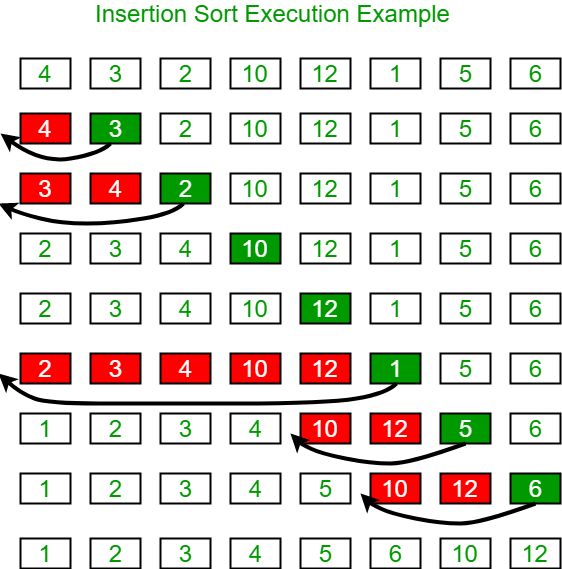

In [49]:
entrada = [98, 87, 67, 34, 5, 4, 3]

def insertionsort(lista):
  cont = 0
  n = len(lista)

  for i in range(1, n): #i vai da posição 1 até a penúltima posição (pois vai fazer referência ao próximo)
    marcado = lista[i] #marcado começa com o elemento da posição 1

    j = i - 1 #j indica a posição anterior ao marcado
    #compara com os elementos anteriores
    #enquanto o marcado for menor que o elemento anterior
    while j >= 0 and marcado < lista[j]: 
      cont +=1
      lista[j + 1] = lista[j] #desloca os elementos para a próxima posição
      j -= 1 #j vai diminuindo para ele comparar com os anteriores
    #Ao final desse passo, encaixamos o elemento marcado na posição j + 1
    lista[j + 1] = marcado
    print(lista)
  print(f'Deslocou {cont} vezes') #deslocar é só 1 passo, trocar são 3 passos
  return lista

print(f'Inicio: {entrada}\n')
print(f'\nFinal: {insertionsort(entrada)}')

Inicio: [98, 87, 67, 34, 5, 4, 3]

[87, 98, 67, 34, 5, 4, 3]
[67, 87, 98, 34, 5, 4, 3]
[34, 67, 87, 98, 5, 4, 3]
[5, 34, 67, 87, 98, 4, 3]
[4, 5, 34, 67, 87, 98, 3]
[3, 4, 5, 34, 67, 87, 98]
Deslocou 21 vezes

Final: [3, 4, 5, 34, 67, 87, 98]


# Recursividade

Para entendermos os algoritmos de ordenação Merger sort e Quick sort precisamos entender sobre recursividade

> Uma função é chamada de função recursiva quando chama a si mesma durante sua execução

Um exemplo clássico é o cálculo do fatorial de um número

In [8]:
def fatorial(n):
  if n == 0:
    return 1
  else:
    return n * fatorial(n-1)

fatorial(5)

120

> A parte mais importante na implementação de uma função recursiva é saber identificar o **caso base, pois ele é o ponto de parada, que garante que a função não execute infinitamente**

No exemplo do fatorial, o caso base é quando o n é igual a zero, nesse caso a função deve retornar o valor 1

> Além disso também precisamos alterar o valor do parâmetro passado na chamada da função (observe que cada vez que fatorial é chamado, o parâmetro é n-1

Aqui precisamos entender que as **chamadas de funções são tratadas como uma pilha**, a última chamada será a primeira a ser retirada da pilha. Observe a ilustração abaixo para o caso do fatorial de 5

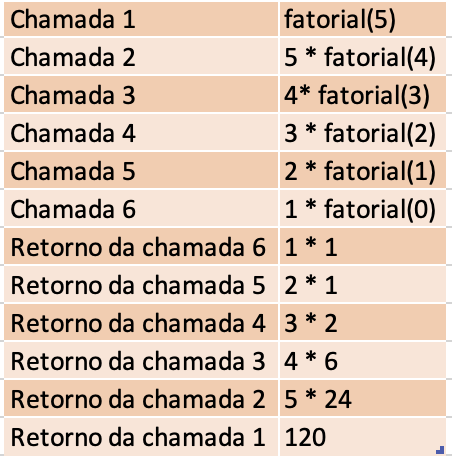

# Exercício

Fazer uma função que retorna o somatório de uma sequencia de números, de 1 a n, usando recursividade:

In [14]:
def soma(n):
  #seu código aqui

soma(10)

55

# Merge sort

Usa a estratégia de **"dividir para conquistar"** como uma forma de melhorar o desempenho dos algoritmos de ordenação.

> O merge sort é um algoritmo recursivo que divide uma lista continuamente pela metade. Se a lista estiver vazia ou tiver um único item, ela está ordenada por definição (o caso base). 

Se a lista tiver mais de um item, dividimos a lista e invocamos recursivamente um merge sort em ambas as metades. Assim que as metades estiverem ordenadas, a operação fundamental, chamada de intercalação, é realizada. 

**Intercalar é o processo de pegar duas listas menores ordenadas e combiná-las de modo a formar uma lista nova, única e ordenada**

> Complexidade O(n logn) no pior caso

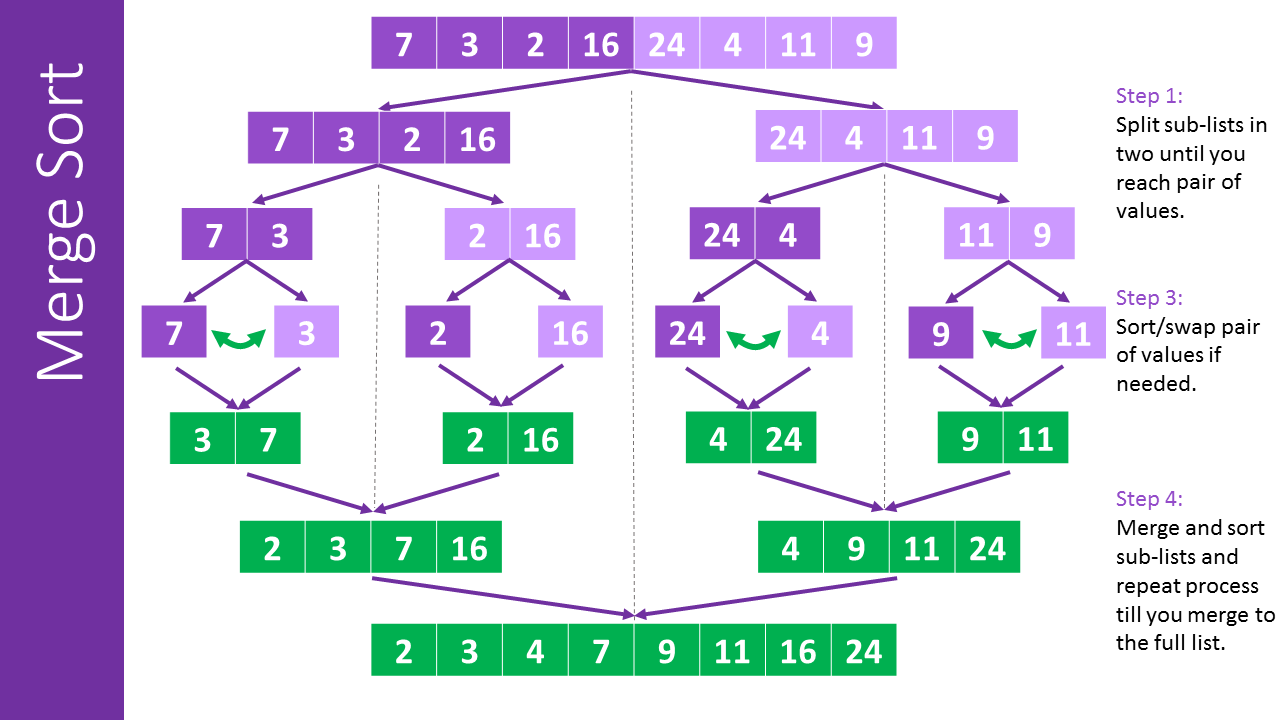

In [50]:
entrada = [98, 87, 67, 34, 5, 4, 3]

def mergesort(lista):
  if len(lista) > 1:
    #divide a lista na metade
    divisao = len(lista) // 2
    esquerda = lista[:divisao].copy() #faz uma copia da primeira metade
    direita = lista[divisao:].copy() #faz uma copia da segunda metade

    mergesort(esquerda) #chama novamente para fazer uma nova divisão da parte esquerda
    mergesort(direita) #chama novamente para fazer uma nova divisão da parte direita
    
    #observe que o programa só chega aqui depois que dividiu tudo
    #aqui temos várias pilhas de merge, a ultima executará primeiro
    i = j = k = 0

    # Ordena esquerda e direita
    while i < len(esquerda) and j < len(direita):#enquanto i e j forem menores que o tamanho das partições
      #testa quem é o elemento menor para colocar na posição k da lista
      if esquerda[i] < direita[j]: 
        lista[k] = esquerda[i]
        i += 1
      else:
        lista[k] = direita[j]
        j += 1
      k += 1

    # Ordenação final (quando ainda tem elementos em uma das partições apenas)
    while i < len(esquerda):
      lista[k] = esquerda[i]
      i += 1
      k += 1
    while j < len(direita):
      lista[k] = direita[j]
      j += 1
      k += 1 
  return lista

print(f'Inicio: {entrada}')
print(f'Final: {mergesort(entrada)}')

Inicio: [98, 87, 67, 34, 5, 4, 3]
Final: [3, 4, 5, 34, 67, 87, 98]


# Quick sort

Também usa a estratégia de **"dividir para conquistar"**.

O funcionamento do Quick Sort baseia-se em uma rotina fundamental cujo nome é **particionamento**. 

> Particionar significa escolher um número qualquer presente na entrada, chamado de pivô, e colocá-lo em uma posição tal que todos os elementos à esquerda são menores ou iguais a ele e todos os elementos à direita são maiores que ele.


**Complexidade quadrática no pior caso**

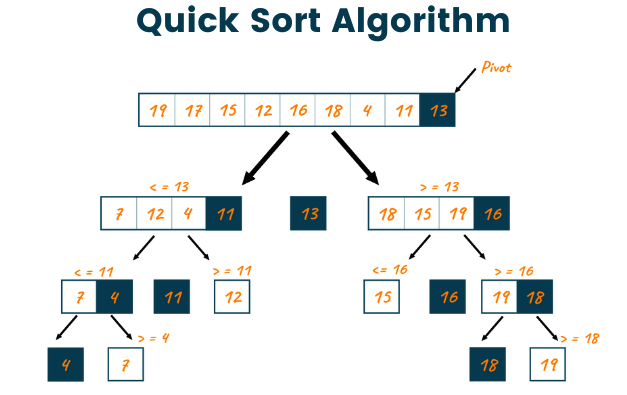

In [51]:
entrada = [98, 87, 67, 34, 5, 4, 3]

def particao(lista, inicio, final):
  pivo = lista[final] #pivo é o elemento mais à direita
  i = inicio - 1 # (i + 1) será a posição do pivo ao final da partição

  for j in range(inicio, final): #percorre os elementos à esquerda do pivô
    if lista[j] < pivo: #testa se o elemento é menor que o pivô
      i += 1 # i marca até que posição os elementos são menores que o pivô
      #o objetivo do i é saber a posição para colocar o pivô ao final da partição
      #if lista[i] > lista[j]: #se o elemento da posição i for maior que o elemento da posição j, troque
      lista[i], lista[j] = lista[j], lista[i]
  
  #aqui fazemos a troca o pivo, lista[final], com o elemento lista[i+1]
  lista[i + 1], lista[final] = lista[final], lista[i + 1]
  #observe que caso o pivo seja menor que todos os elementos à direita, 
  #ele será trocado exatamente com o mais à esquerda
  return i + 1 #posição do pivo ao final da partição

def quicksort(lista, inicio, final):
  if inicio < final:
    posicao = particao(lista, inicio, final) #posição do pivo
    # Esquerda
    quicksort(lista, inicio, posicao - 1) #esquerda do pivo
    # Direito
    quicksort(lista, posicao + 1, final) #direita do pivo
  return lista

print(f'Inicio: {entrada}')
print(f'Final: {quicksort(entrada, 0, len(entrada) - 1)}')

Inicio: [98, 87, 67, 34, 5, 4, 3]
Final: [3, 4, 5, 34, 67, 87, 98]


# Comparando tempo de execução

In [52]:
import random
teste = []
for i in range(5000): #gerando um teste com 5000 elementos
  teste.append(random.randint(1, 100))

In [53]:
print(teste[0:10]) #visualizando os 10 primeiros elementos do teste

[50, 92, 9, 98, 84, 15, 35, 75, 69, 94]


In [44]:
%timeit bubblesort(teste.copy())

1 loop, best of 5: 3.15 s per loop


In [43]:
%timeit selectionsort(teste.copy())

1 loop, best of 5: 1.26 s per loop


In [45]:
%timeit insertionsort(teste.copy())

1 loop, best of 5: 1.7 s per loop


In [41]:
%timeit mergesort(teste.copy())

10 loops, best of 5: 32.7 ms per loop


In [40]:
%timeit quicksort(teste.copy(), 0, len(teste)-1)

10 loops, best of 5: 24.3 ms per loop
